In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# File to Load
housing_data_to_load = "Housing prices for US.csv"
index_data_to_load = "SPX_Prices_30yr_SPXFirstOfMonth.csv"

# Read the files
housing_data = pd.read_csv(housing_data_to_load)
index_data = pd.read_csv(index_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(index_data, housing_data, on="DATE")

combined_data.head()

,Ticker,DATE,PX_LAST,PX_VOLUME,Sector,MSPUS
0,SPX Index ...,7/1/2018,2718.37,1.372573e+10,All,325200
1,SPX Index ...,4/1/2018,2640.87,1.414357e+10,All,315600
2,SPX Index ...,1/1/2018,2673.61,1.138053e+10,All,331800
3,SPX Index ...,10/1/2017,2519.36,1.101544e+10,All,337900
4,SPX Index ...,7/1/2017,2423.41,1.426348e+10,All,320500


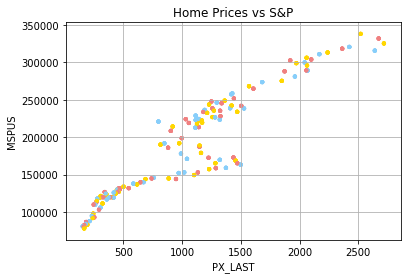

In [39]:
# Scatter plot, similar to matplotlib homeworks
# Obtain the x and y coordinates
x="PX_LAST"
y="MSPUS"
mycolors = ["gold", "lightskyblue", "lightcoral"]

fig, ax = plt.subplots()

for i, (Sector) in enumerate(combined_data):
    combined_data.plot.scatter(x, y, s=10, color=mycolors, grid=True, ax=ax, title="Home Prices vs S&P")

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

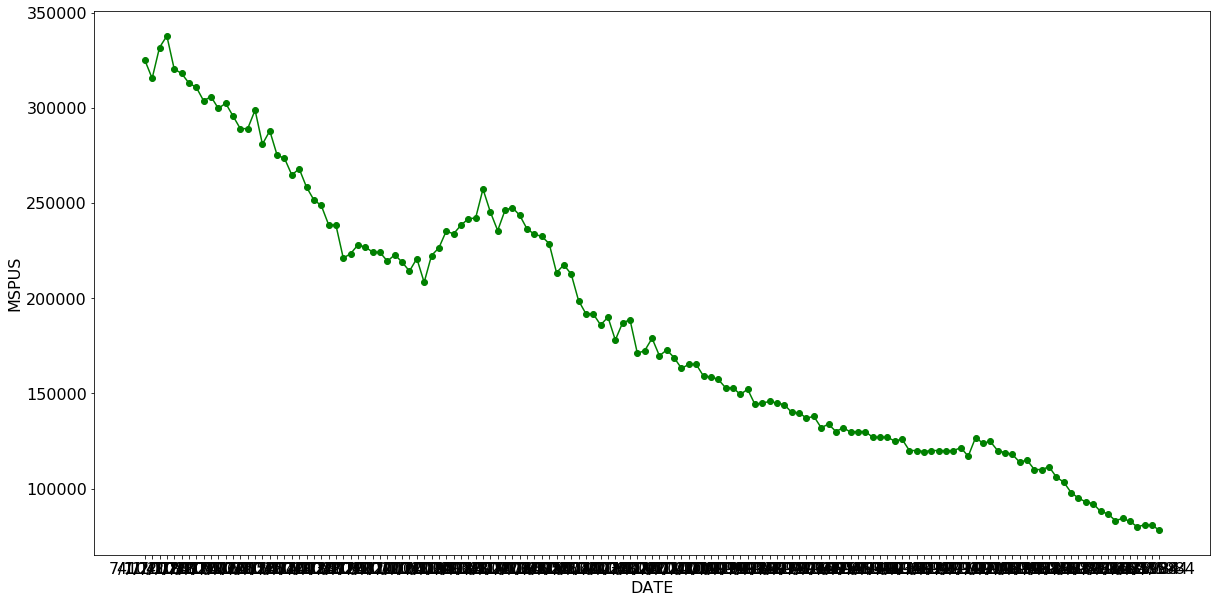

In [42]:
# plot graph of housing prices

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("DATE")
ax1.set_ylabel(y)

data1 = combined_data["MSPUS"]
x_axis1 = combined_data["DATE"]

cost_trend = plt.plot(x_axis1,data1,color='g',marker = "o")

plt.show


In [ ]:
#plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
#plt.ylim(0, 1000)
#plt.xlim(0, 350000)

#plt.title("Home Prices vs S&P 500")
#plt.xlabel("Average Home Prices")
#plt.ylabel("DATE")